In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, DataFrame, get_dummies, Series
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from plotly import graph_objs, figure_factory

# Data Reading
dataset = read_csv("/content/hournew.csv")

# Convert date column
dataset['dteday'] = pd.to_datetime(dataset['dteday'])
dataset['day_of_year'] = dataset['dteday'].dt.dayofyear
dataset['day_of_week'] = dataset['dteday'].dt.dayofweek

# Initial Data Exploration
print(dataset.describe())
print(dataset.shape)
print(dataset.info())

           instant                      dteday  season      yr         mnth  \
count  1623.000000                        1623  1623.0  1623.0  1623.000000   
mean    812.000000  2011-04-14 06:27:43.585952     1.0     0.0     1.752311   
min       1.000000         2011-01-01 00:00:00     1.0     0.0     1.000000   
25%     406.500000         2011-01-28 00:00:00     1.0     0.0     1.000000   
50%     812.000000         2011-02-24 00:00:00     1.0     0.0     2.000000   
75%    1217.500000         2011-07-01 00:00:00     1.0     0.0     2.000000   
max    1623.000000         2011-12-03 00:00:00     1.0     0.0     3.000000   
std     468.664059                         NaN     0.0     0.0     0.734238   

                hr      holiday      weekday   workingday   weathersit  \
count  1623.000000  1623.000000  1623.000000  1623.000000  1623.000000   
mean     11.777572     0.029575     3.046827     0.663586     1.478743   
min       0.000000     0.000000     0.000000     0.000000     1.00

<ipython-input-22-d319d3ea2b0e>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['dteday'] = pd.to_datetime(dataset['dteday'])


In [ ]:
# Data Encoding (one-hot encode categorical variables)
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# Explicitly specify the 'columns' parameter to tell get_dummies which columns to encode.
dataset = get_dummies(dataset, columns=categorical_columns)

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       1623 non-null   int64         
 1   dteday        1623 non-null   datetime64[ns]
 2   hr            1623 non-null   int64         
 3   temp          1623 non-null   float64       
 4   atemp         1623 non-null   float64       
 5   hum           1623 non-null   float64       
 6   windspeed     1623 non-null   float64       
 7   casual        1623 non-null   int64         
 8   registered    1623 non-null   int64         
 9   cnt           1623 non-null   int64         
 10  day_of_year   1623 non-null   int32         
 11  day_of_week   1623 non-null   int32         
 12  season_1      1623 non-null   bool          
 13  yr_0          1623 non-null   bool          
 14  mnth_1        1623 non-null   bool          
 15  mnth_2        1623 non-null   bool    

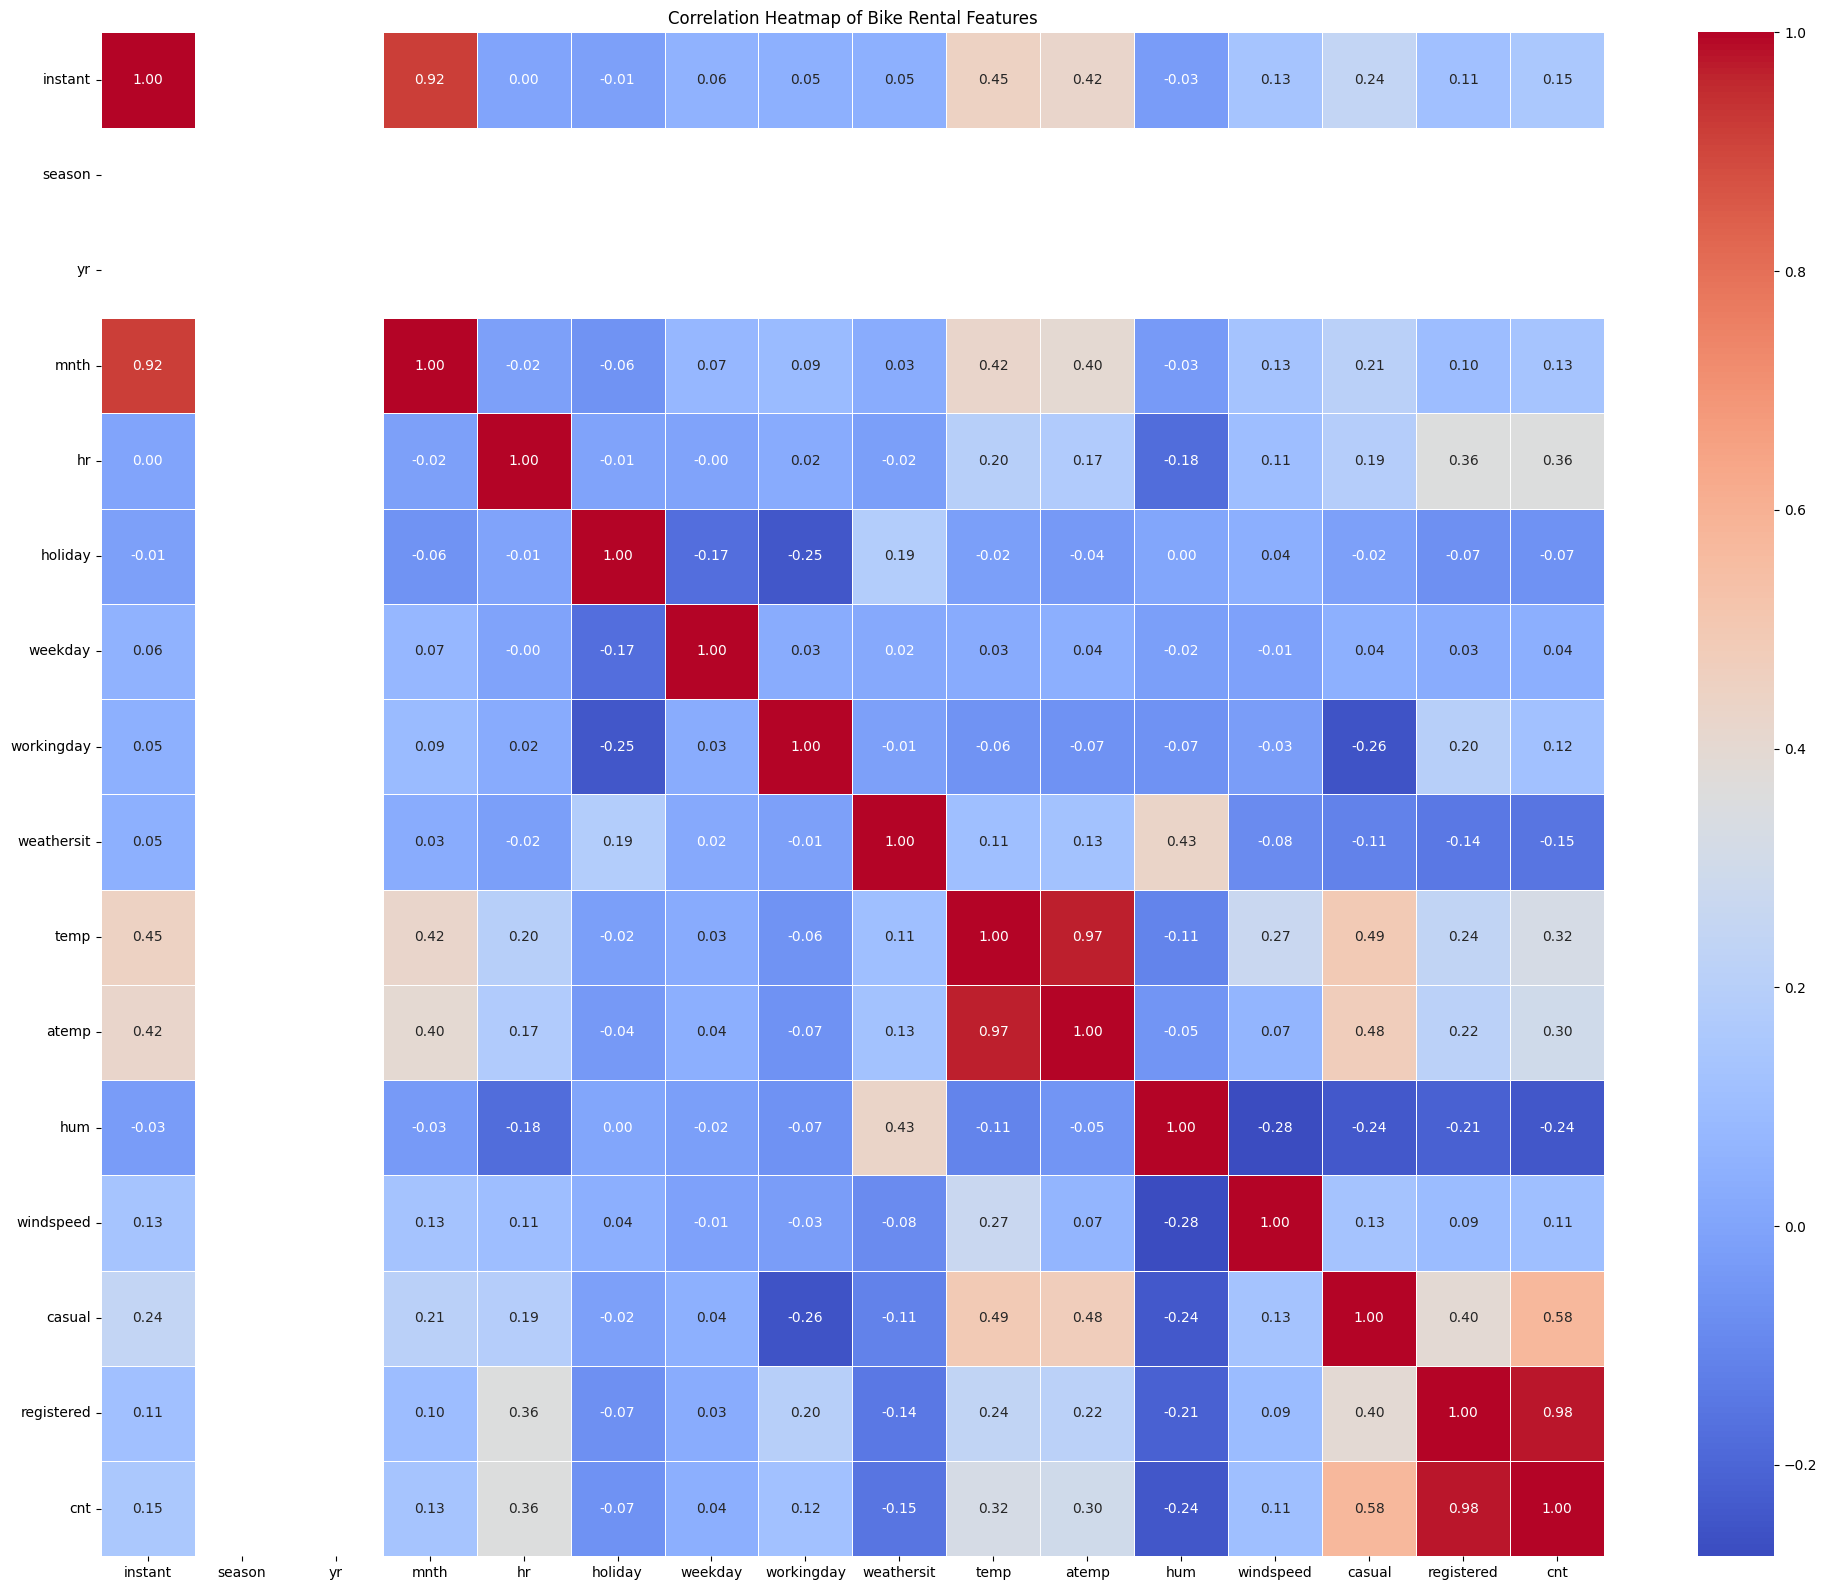

In [ ]:
# Prepare for Correlation Heatmap
# Drop non-numeric columns
correlation_data = dataset.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap using Seaborn (more reliable for large datasets)
plt.figure(figsize=(20,16))
correlation = correlation_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Bike Rental Features')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare Features and Target
X = dataset.drop(['cnt', 'instant', 'dteday', 'casual', 'registered'], axis=1)
Y = dataset['cnt']

print("Features shape:", X.shape)
print("Target shape:", Y.shape)

Features shape: (1623, 14)
Target shape: (1623,)


In [ ]:
# Data Scaling
X_ = StandardScaler().fit_transform(X)
X_ = DataFrame(X_)


In [ ]:
LinearRegression1 = linear_model.SGDRegressor(random_state = 1, penalty = None)
# building
Hparameter1 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(X_,Y)

best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search1.best_score_
print("Best result: ", best_result)
best_model = grid_search1.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))


Best parameters:  {'eta0': 0.0001, 'max_iter': 10000}
Best result:  0.18876791317395675
Intercept β0:  [66.12495297]
       Features  Coefficients
3            hr     16.895870
8          temp     10.265707
6    workingday      7.962660
9         atemp      5.915350
13  day_of_week      3.066470
5       weekday      1.454747
4       holiday      1.094217
2          mnth      0.804644
0        season      0.000000
1            yr      0.000000
12  day_of_year     -0.060541
11    windspeed     -0.223599
10          hum     -6.189790
7    weathersit     -7.464447


In [ ]:
 #Linear Regression Models

# 1. Linear Regression without Regularization
LinearRegression1 = linear_model.SGDRegressor(random_state=1, penalty=None)
Hparameter1 = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [10000, 20000, 30000, 40000]
}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(X_, Y)

print("\nLinear Regression (No Regularization):")
print("Best parameters: ", grid_search1.best_params_)
print("Best R² score: ", grid_search1.best_score_)
best_model = grid_search1.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients'])
    .sort_values(by=['Coefficients'], ascending=False))


Linear Regression (No Regularization):
Best parameters:  {'eta0': 0.0001, 'max_iter': 10000}
Best R² score:  0.18876791317395675
Intercept β0:  [66.12495297]
       Features  Coefficients
3            hr     16.895870
8          temp     10.265707
6    workingday      7.962660
9         atemp      5.915350
13  day_of_week      3.066470
5       weekday      1.454747
4       holiday      1.094217
2          mnth      0.804644
0        season      0.000000
1            yr      0.000000
12  day_of_year     -0.060541
11    windspeed     -0.223599
10          hum     -6.189790
7    weathersit     -7.464447


In [ ]:
# 2. Linear Regression with L1 Regularization (Lasso)
LinearRegression_L1 = linear_model.SGDRegressor(random_state=1, penalty='l1')
grid_search_L1 = GridSearchCV(
    estimator=LinearRegression_L1,
    param_grid=Hparameter1,
    scoring='r2',
    cv=5
)
grid_search_L1.fit(X_, Y)

print("\nLinear Regression (L1 Regularization):")
print("Best parameters: ", grid_search_L1.best_params_)
print("Best R² score: ", grid_search_L1.best_score_)
best_model_L1 = grid_search_L1.best_estimator_
print("Intercept β0: ", best_model_L1.intercept_)
print(DataFrame(zip(X.columns, best_model_L1.coef_), columns=['Features','Coefficients'])
    .sort_values(by=['Coefficients'], ascending=False))


Linear Regression (L1 Regularization):
Best parameters:  {'eta0': 0.0001, 'max_iter': 10000}
Best R² score:  0.18877703490779263
Intercept β0:  [66.12495297]
       Features  Coefficients
3            hr     16.895778
8          temp     10.265604
6    workingday      7.962480
9         atemp      5.915362
13  day_of_week      3.066313
5       weekday      1.454620
4       holiday      1.093975
2          mnth      0.804527
0        season      0.000000
1            yr      0.000000
12  day_of_year     -0.060413
11    windspeed     -0.223394
10          hum     -6.189708
7    weathersit     -7.464334


In [ ]:
# 3. Linear Regression with L2 Regularization (Ridge)
LinearRegression_L2 = linear_model.SGDRegressor(random_state=1, penalty='l2')
grid_search_L2 = GridSearchCV(
    estimator=LinearRegression_L2,
    param_grid=Hparameter1,
    scoring='r2',
    cv=5
)
grid_search_L2.fit(X_, Y)

print("\nLinear Regression (L2 Regularization):")
print("Best parameters: ", grid_search_L2.best_params_)
print("Best R² score: ", grid_search_L2.best_score_)
best_model_L2 = grid_search_L2.best_estimator_
print("Intercept β0: ", best_model_L2.intercept_)
print(DataFrame(zip(X.columns, best_model_L2.coef_), columns=['Features','Coefficients'])
    .sort_values(by=['Coefficients'], ascending=False))


Linear Regression (L2 Regularization):
Best parameters:  {'eta0': 0.0001, 'max_iter': 10000}
Best R² score:  0.18877578246599563
Intercept β0:  [66.12495297]
       Features  Coefficients
3            hr     16.894363
8          temp     10.264517
6    workingday      7.961622
9         atemp      5.915630
13  day_of_week      3.065932
5       weekday      1.454567
4       holiday      1.093552
2          mnth      0.804925
0        season      0.000000
1            yr      0.000000
12  day_of_year     -0.060644
11    windspeed     -0.223180
10          hum     -6.189807
7    weathersit     -7.463641


In [ ]:
# 4. Elastic Net Regularization
LinearRegression_Elastic = linear_model.SGDRegressor(random_state=1, penalty='elasticnet')
Hparameter_Elastic = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [5000, 7000, 10000, 12000],
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}
grid_search_Elastic = GridSearchCV(
    estimator=LinearRegression_Elastic,
    param_grid=Hparameter_Elastic,
    scoring='r2',
    cv=5
)
grid_search_Elastic.fit(X_, Y)

print("\nElastic Net Regularization:")
print("Best parameters: ", grid_search_Elastic.best_params_)
print("Best R² score: ", grid_search_Elastic.best_score_)
best_model_Elastic = grid_search_Elastic.best_estimator_
print("Intercept β0: ", best_model_Elastic.intercept_)
print(DataFrame(zip(X.columns, best_model_Elastic.coef_), columns=['Features','Coefficients'])
    .sort_values(by=['Coefficients'], ascending=False))


Elastic Net Regularization:
Best parameters:  {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 1, 'max_iter': 5000}
Best R² score:  0.20198326396288618
Intercept β0:  [66.31904829]
       Features  Coefficients
8          temp     26.686257
3            hr     12.829164
6    workingday      7.910015
5       weekday      3.017568
4       holiday      0.407382
0        season      0.000000
1            yr      0.000000
2          mnth      0.000000
12  day_of_year      0.000000
13  day_of_week      0.000000
7    weathersit     -5.528201
11    windspeed     -6.295967
10          hum     -8.880356
9         atemp     -9.953510


In [ ]:
# 5. Support Vector Regression
cv = 8
SVRegressor = SVR()
Hparameters_SVR = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [100, 1000, 10000],
    'epsilon': [100, 1000, 10000]
}
grid_search_SVR = GridSearchCV(
    estimator=SVRegressor,
    param_grid=Hparameters_SVR,
    scoring='r2',
    cv=cv
)
grid_search_SVR.fit(X_, Y)

print("\nSupport Vector Regression:")
print("Best parameters: ", grid_search_SVR.best_params_)
best_result_SVR = grid_search_SVR.best_score_
print("Best R² score: ", best_result_SVR)


Support Vector Regression:
Best parameters:  {'C': 10000, 'epsilon': 100, 'kernel': 'rbf'}
Best R² score:  -0.122296129761659


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Calculate Modified R²
r, c = X_.shape
modified_r2_SVR = 1-(1-best_result_SVR)*((cv-1)/cv*r-1)/((cv-1)/cv*r-c-1)
print("Modified R²: ", modified_r2_SVR)

Modified R²:  -0.13347815685295905


In [ ]:
# 6. Random Forest Regression
RF_Regressor = RandomForestRegressor(
    criterion='squared_error',
    max_features='sqrt',
    random_state=1
)
no_Trees = {'n_estimators': [10, 20, 30, 40, 50, 100]}
grid_search_RF = GridSearchCV(
    estimator=RF_Regressor,
    param_grid=no_Trees,
    scoring='r2',
    cv=5
)
grid_search_RF.fit(X_, Y)

print("\nRandom Forest Regression:")
print("Best parameters: ", grid_search_RF.best_params_)
best_result_RF = grid_search_RF.best_score_
print("Best R² score: ", best_result_RF)


Random Forest Regression:
Best parameters:  {'n_estimators': 50}
Best R² score:  0.6302424094077749


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Calculate Modified R²
modified_r2_RF = 1-(1-best_result_RF)*(4/5*r-1)/(4/5*r-c-1)
print("Modified R²: ", modified_r2_RF)


Modified R²:  0.6262088997706461


In [ ]:
# Feature Importance (Random Forest)
Important_feature = Series(
    grid_search_RF.best_estimator_.feature_importances_,
    index=list(X.columns)
).sort_values(ascending=False)
print("\nFeature Importances:")
print(Important_feature)


Feature Importances:
hr             0.455455
hum            0.098523
atemp          0.090709
temp           0.089401
windspeed      0.063214
day_of_year    0.048989
weekday        0.036844
weathersit     0.032787
day_of_week    0.030809
workingday     0.027350
mnth           0.024076
holiday        0.001844
season         0.000000
yr             0.000000
dtype: float64


In [ ]:
# Example Prediction (replace with your actual new data)
new_data = [[
   11.0,23,106,223,55,245,10,97,12,36,32,98,77,76
]]
prediction = grid_search_RF.best_estimator_.predict(new_data)
print("\nPrediction for new data:", prediction[0])


Prediction for new data: 73.62
